In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import dstn, idstn 

from classicalfield import FiniteTempGPE as gpe

In [13]:
def dst(x, y, karr, L, T): 
    '''
    Parameters: 
    x - 2D array of x values 
    y - 2D array of y values
    karr - 1D grid of all momentum values for the system (discretized) 
    L - length of the box
    T - Temperature
    noise - Thermal noise 
    '''

    randr = np.random.normal(size = (len(karr), len(karr))) 
    randi = np.random.normal(size = (len(karr), len(karr))) 
    grn = (randr + 1.0j*randi)/np.sqrt(2) 

    dst_result = np.zeros_like(x) 
    for i in range(1,len(karr)): 
        for j in range(1,len(karr)): 
            dst_result += np.sqrt(2*T/((np.pi/L)**2 * ((karr[i])**2 + (karr[j])**2))) * np.sin(np.pi/L * (karr[i]) * x) * np.sin(np.pi/L * (karr[j])*y)

    return 2/L * np.multiply(grn, dst_result) 


In [5]:
g = gpe(Nsamples = 1, numRealSteps = 0)

No vortices to be spawned
Total Imag Time:  55.46485257148743


In [31]:
x = g.xi[0]
y = g.xi[1]
karr = g.ki[0][0]
L = g.L 
T = g.T

print(np.shape(karr[:, None, None] * x))
#thermal_x = dst(x, y, karr, L, T)

(1024, 1024, 1024)


In [30]:
a = np.array([[5,6]]).T
b = np.array([[1,2],[3,4]])
print(a*b)

[[ 5 10]
 [18 24]]


In [ ]:
def dst(x, y, karr, L, T): 
    '''
    Parameters: 
    x - 2D array of x values 
    y - 2D array of y values
    karr - 1D grid of all momentum values for the system (discretized) 
    L - length of the box
    T - Temperature
    '''
    # Size of the karr
    N = len(karr)

    # Generate random complex normal distributed values (randr + 1.0j*randi)
    grn = (np.random.normal(size=(N, N)) + 1j * np.random.normal(size=(N, N))) / np.sqrt(2)

    # Precompute the sine terms
    pi_over_L = np.pi / L
    sin_x = np.sin(pi_over_L * karr[:, None] * x)  
    sin_y = np.sin(pi_over_L * karr[None, :] * y)  

    # Precompute the scaling factor (1 / ((k_x^2 + k_y^2)))
    karr_sq = karr**2
    scaling = np.sqrt(2 * T / ((np.pi / L)**2 * (karr_sq[:, None] + karr_sq[None, :])))  # (N, N)

    # Compute the DST result
    dst_result = np.sum(scaling * sin_x[:, :, None] * sin_y[:, None, :], axis=(0, 1))

    return (2 / L) * grn * dst_result


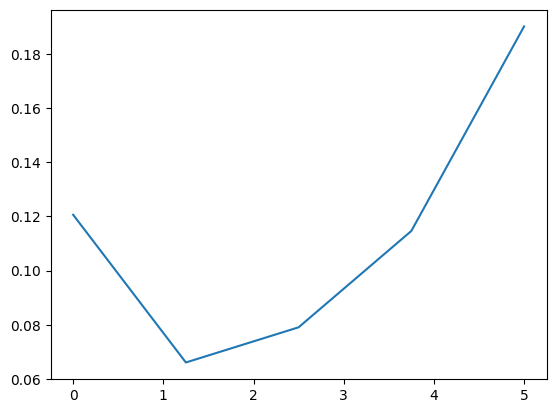

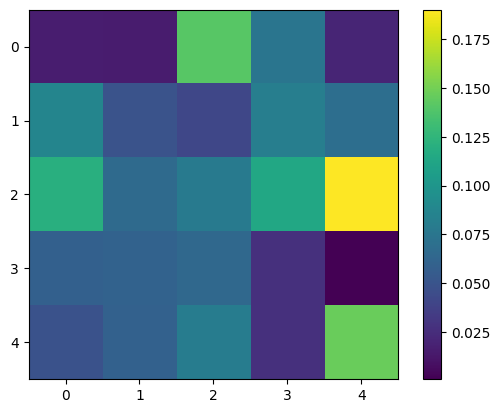

In [61]:
arr = np.random.normal(size = (5,5))
#arr[2][2] = 1
psi_th = idstn(arr, type = 1) 
plt.plot(np.linspace(0,5, len(arr)), np.abs(psi_th[len(psi_th)//2]))
plt.figure() 
plt.imshow(np.abs(psi_th))
plt.colorbar() 

In [64]:
print(len(karr)/8)

128.0


In [240]:
print(np.max(x) )

64.0


In [261]:
# test your own to see it operates on the boundaries correctly, then compare to the other one 
karr = g.ki[0][0]
karr = karr[::16]
L = 50

axes = [] 
for i in range(2): 

    #axes.append(np.linspace(-len(karr)//2,len(karr)//2,len(karr)) ) ## Current version
    axes.append(np.linspace(0,L,len(karr)) )
            
axes_arr = np.array(axes) 
x, y = np.meshgrid(*axes_arr)
N = 16*len(karr)
# L = 32 * np.max(x) 

randr = np.random.normal(size = (len(karr), len(karr))) 
randi = np.random.normal(size = (len(karr), len(karr))) 
grn = (randr + 1.0j*randi)/np.sqrt(2) 

dst_result = np.zeros((len(karr), len(karr)))
#for i in range(1,len(karr)): 
for i in range(1,len(karr)): 
    print(i)
    for j in range(1,len(karr)): 
        #np.sqrt(2*T/((np.pi/L)**2 * ((karr[i])**2 + (karr[j])**2))) *
        dst_result +=  np.sin(np.pi/(N) * (karr[i]) * x) * np.sin(np.pi/(N) * (karr[j])*y)

dst_out = dst_result 
#dst_out = 2/L * np.multiply(grn, dst_result) 

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63


In [267]:
print(np.shape(karr))


print(karr[1] - karr[0])

print(g.dk)

(64,)
1.0053096491487352
1.0053096491487339


In [199]:
print(dst_out)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.00445722 -0.00889454 ... -0.05367506  0.05620587
  -0.05848588]
 [ 0.         -0.00889454  0.0177494  ...  0.10711062 -0.11216094
   0.11671078]
 ...
 [ 0.         -0.05367506  0.10711062 ...  0.64637041 -0.67684711
   0.7043036 ]
 [ 0.          0.05620587 -0.11216094 ... -0.67684711  0.70876081
  -0.73751189]
 [ 0.         -0.05848588  0.11671078 ...  0.7043036  -0.73751189
   0.76742925]]


In [206]:
print(np.max(x))
print(L)

64.0
32.0


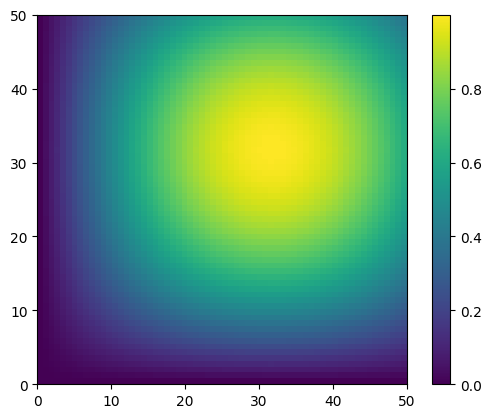

In [260]:
plt.figure() 
plt.imshow(np.abs(dst_out), extent = [np.min(x), np.max(x), np.min(x), np.max(x)], origin = 'lower') # not zero on y = L and x = L borders 
plt.colorbar() 

Trying something different

In [304]:
print(L//g.dx)
N = int(L//g.dx)
inc = np.arange(1, int(L//g.dx)+1)

axes = [] 
for i in range(2): 

    #axes.append(np.linspace(-len(karr)//2,len(karr)//2,len(karr)) ) ## Current version
    axes.append(np.linspace(0,L,N) )
            
axes_arr = np.array(axes) 
x, y = np.meshgrid(*axes_arr)


#dst_result = np.zeros((N, N))
siny = np.zeros((N, N))
sinx = np.zeros((N, N))
for i in range(0,N): 
    sinx += np.sin(np.pi/(N) * (inc[i]) * x//g.dx)
for j in range(0,N): 
    print(inc[j])
    #np.sqrt(2*T/((np.pi/L)**2 * ((karr[i])**2 + (karr[j])**2))) *
    
    siny +=  np.sin(np.pi/(N) * (inc[j])*y//g.dx)

## test to see what the output is at x or y = L and see what needs changing - still sum over k but now fix x or y at L 

dst_result = np.multiply(sinx, siny)

512.0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
27

In [297]:
print(N) ## not canceling because x and y are in physical distances and N is in number of points 
print(x//g.dx)

512
[[  0.   1.   2. ... 509. 510. 512.]
 [  0.   1.   2. ... 509. 510. 512.]
 [  0.   1.   2. ... 509. 510. 512.]
 ...
 [  0.   1.   2. ... 509. 510. 512.]
 [  0.   1.   2. ... 509. 510. 512.]
 [  0.   1.   2. ... 509. 510. 512.]]


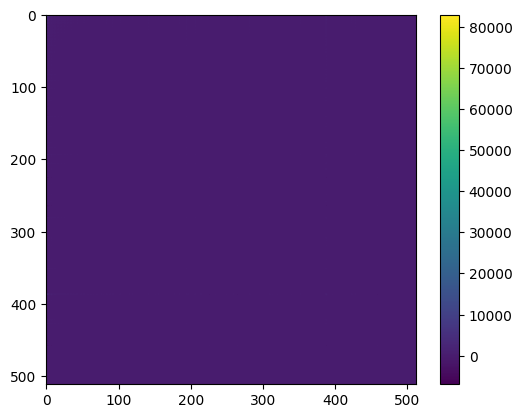

In [305]:
plt.figure() 
plt.imshow(dst_result)
plt.colorbar() 

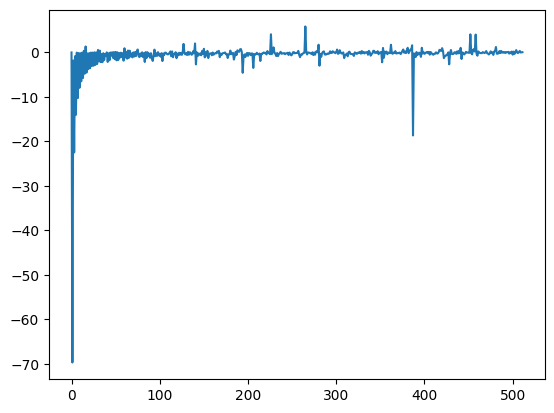

In [310]:
plt.figure() 
plt.plot(dst_result[:,N-1])

In [274]:
print(np.shape(inc))

(511,)


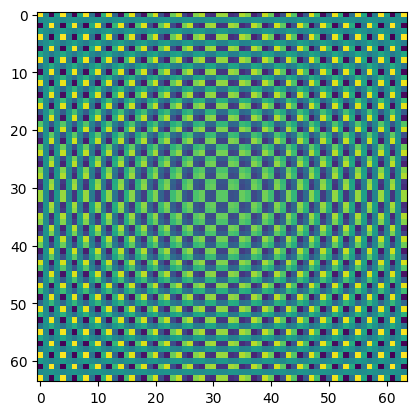

In [198]:
dst_input = np.zeros((64,64))
dst_input[32,32] = 1
dst_sp_out = idstn(dst_input, type = 1) 

plt.figure() 
plt.imshow(dst_sp_out)

64.0
[-39.81102362  39.81102362]
[-0.62204724  0.62204724]


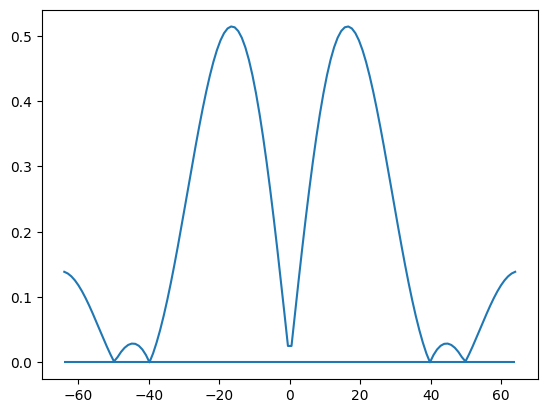

In [119]:
plt.figure() 
plt.plot(x[0], np.abs(dst_out[len(dst_out)//2]))
plt.hlines(0, np.min(x[0]),np.max(x[0]))
print(np.max(x[0]))

print(x[len(dst_out)//2][np.abs(dst_out[len(dst_out)//2])<0.001])
print(x[len(dst_out)//2][np.abs(dst_out[len(dst_out)//2])<0.001]/np.max(x[0]))

In [70]:
import time

In [71]:
t0 = time.time() 
np.sqrt(2*T/((np.pi/L)**2 * ((karr[i])**2 + (karr[j])**2))) * np.sin(np.pi/L * (karr[i]) * x) * np.sin(np.pi/L * (karr[j])*y)
print(time.time() - t0)

0.03429412841796875


In [72]:
0.03 * 128

3.84